# 1. Import and Install Dependencies

In [ ]:
# https://github.com/peachman05/action-recognition-tutorial/blob/master/model_ML.py

In [54]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0d27ad52bbd4243a10aec2510592e43b383a773e3fd3f20875f6ee2913e84d53
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False        
    results = model.process(image)
    image.flags.writeable = True   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return results, image

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)                                 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )

    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Run detection
        results, image = mediapipe_detection(frame, holistic)
        
        # Draw Landmarks
        draw_landmarks(image, results)
                                 
        # Render to Screen                
        cv2.imshow('Mediapipe Holistic', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3. Extract Keypoint Values

In [11]:
results.pose_landmarks.landmark

[x: 0.4290786385536194
y: 0.4786394536495209
z: -1.0390465259552002
visibility: 0.9999060034751892
, x: 0.46109122037887573
y: 0.40952831506729126
z: -1.0143544673919678
visibility: 0.999836266040802
, x: 0.4823060631752014
y: 0.4049685597419739
z: -1.0143033266067505
visibility: 0.9998345375061035
, x: 0.5036102533340454
y: 0.39966967701911926
z: -1.014255166053772
visibility: 0.9998073577880859
, x: 0.41022247076034546
y: 0.4135352373123169
z: -0.9701515436172485
visibility: 0.9998281002044678
, x: 0.39780962467193604
y: 0.41162440180778503
z: -0.9701620936393738
visibility: 0.9998394846916199
, x: 0.3868972957134247
y: 0.40884220600128174
z: -0.9698022603988647
visibility: 0.9998443722724915
, x: 0.5394488573074341
y: 0.403439998626709
z: -0.6998633742332458
visibility: 0.99985671043396
, x: 0.385881245136261
y: 0.41217347979545593
z: -0.49232855439186096
visibility: 0.9998207092285156
, x: 0.4768320918083191
y: 0.5357447266578674
z: -0.9079330563545227
visibility: 0.999947488307952

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
np.save('0',np.concatenate([pose, face, lh, rh]))

In [14]:
np.load('0.npy')

array([ 0.42907864,  0.47863945, -1.03904653, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
extract_keypoints(results).shape

(1662,)

# 4. Setup Folders for Collection

In [19]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [20]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [110]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    ## 1. START Action loop, Sequence loop, Frame loop
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
    ## 1. END Action loop, Sequence loop, Frame loop
                ret, frame = cap.read()                
                
                # Run detection
                results, image = mediapipe_detection(frame, holistic)

                # Draw Landmarks
                draw_styled_landmarks(image, results)

                ## 2. NEW Logic for collecting frames
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA )
                    cv2.putText(image, 'Collecting frames for {} Sequence number {}'.format(action, sequence)
                            , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Mediapipe Holistic', image)
                    cv2.waitKey(500)                
                else: 
                    cv2.putText(image, 'Collecting frames for {} Sequence number {}'.format(action, sequence)
                            , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Mediapipe Holistic', image)
                
                keypoints = extract_keypoints(results)                
                ## 2. END Logic for collecting frames
                
                ## 3. NEW Export collected keypoints 
                npy_path = os.path.join(DATA_PATH, action, str(sequence), '{}'.format(frame_num))
                np.save(npy_path,keypoints)
                ## 3. END Export collected keypoints
                
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [111]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [112]:
X = np.array(sequences)

In [113]:
X.shape

(90, 30, 1662)

In [114]:
y = to_categorical(labels).astype(int)

In [115]:
y.shape

(90, 3)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85, 30, 1662), (5, 30, 1662), (85, 3), (5, 3))

# 7. Build and Train LSTM Neural Network

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [119]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [130]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [131]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [164]:
model.fit(X_train,y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 622ms/step - loss: 0.3686 - categorical_accuracy: 0.7882
Epoch 2/2000
3/3 [==============================] - 1s 356ms/step - loss: 0.2450 - categorical_accuracy: 0.8824
Epoch 3/2000
3/3 [==============================] - 1s 363ms/step - loss: 0.2492 - categorical_accuracy: 0.9412
Epoch 4/2000
3/3 [==============================] - 1s 357ms/step - loss: 0.2459 - categorical_accuracy: 0.9176
Epoch 5/2000
3/3 [==============================] - 1s 352ms/step - loss: 0.1955 - categorical_accuracy: 0.9765
Epoch 6/2000
3/3 [==============================] - 1s 339ms/step - loss: 0.1684 - categorical_accuracy: 0.9529
Epoch 7/2000
3/3 [==============================] - 1s 345ms/step - loss: 0.1505 - categorical_accuracy: 0.9529
Epoch 8/2000
3/3 [==============================] - 1s 344ms/step - loss: 0.1122 - categorical_accuracy: 0.9882
Epoch 9/2000
3/3 [==============================] - 1s 342ms/step - loss: 0.0963 - categorical_accuracy:

KeyboardInterrupt: 

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [144]:
res = model.predict(X_test)

In [145]:
actions[np.argmax(res[0])]

'iloveyou'

In [146]:
actions[np.argmax(y_test[0])]

'iloveyou'

# 9. Save Weights

In [127]:
model.save('action.h5')

In [128]:
del model

In [132]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [147]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [174]:
yhat = model.predict(X_test)

In [175]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [176]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [177]:
accuracy_score(ytrue, yhat)

1.0

In [178]:
actions

array(['hello', 'thanks', 'iloveyou'], dtype='<U8')

# 11. Test in Real Time

In [139]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

In [140]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame,(0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA )
    
    return output_frame

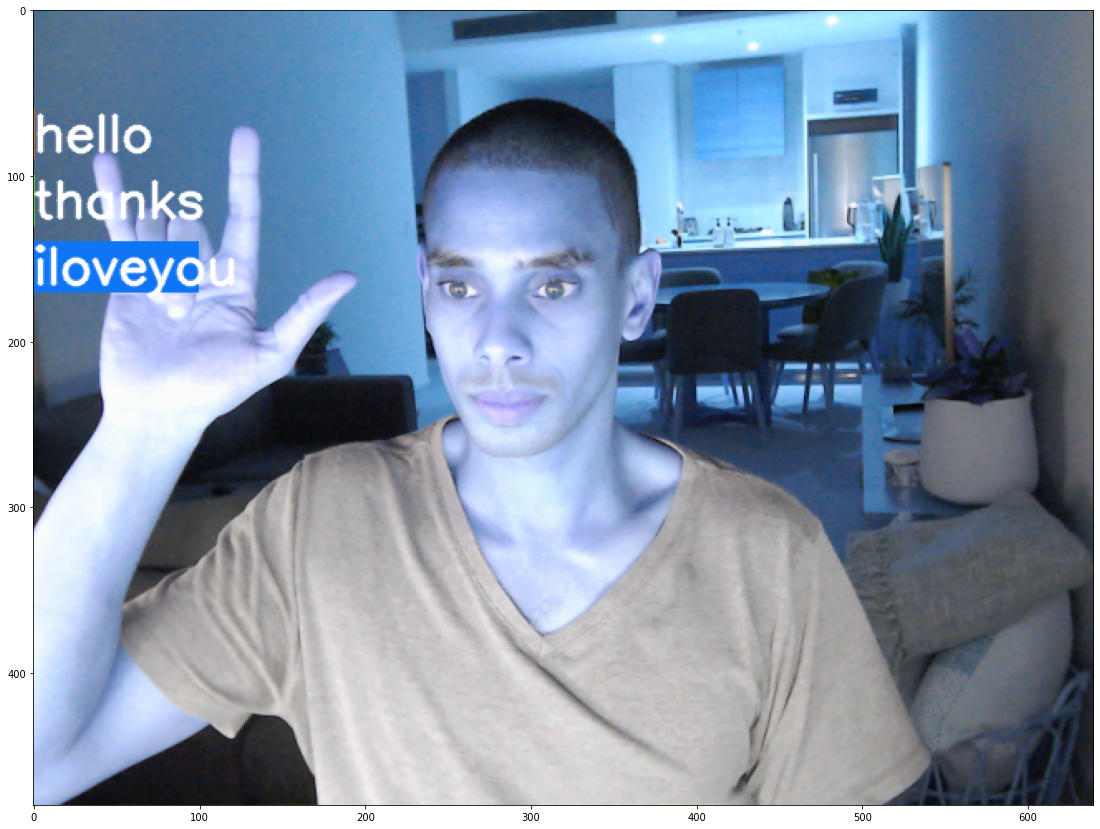

In [141]:
plt.figure(figsize=(19,19))
plt.imshow(prob_viz(res[0], actions, frame, colors))

In [180]:
## 1. NEW Variables
sequence = []
sentence = []
threshold = .4
## 1. END Variables

cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Run detection
        results, image = mediapipe_detection(frame, holistic)

        # Draw Landmarks
        draw_styled_landmarks(image, results)
        
        # Extract keypoints
        keypoints = extract_keypoints(results)
        
        ## 2. START Predictions
        sequence.insert(0,keypoints)     # Add keypoints to sequence
        sequence = sequence[:30]         # Grab last 30 frames
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0] # PREDICTION
            print(res)
        ## 2. END Predictions    
            
        ## 3. NEW Sentence Logic
            if res[np.argmax(res)] >= threshold:
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else: 
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]
            
                    
        ## 4. NEW Prob viz   
            image = prob_viz(res, actions, image, colors)
        ## 4. END Prob viz
        
        cv2.rectangle(image,(0,0), (640, 40), (245, 117, 16), -1) # Draw header rectangle 
        cv2.putText(image, ' '.join(sentence), (3,30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA )
        
        ## 3. END Sentence Logic

        
        cv2.imshow('Action Detection', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

[9.9572146e-01 4.0010237e-03 2.7748622e-04]
[9.9652076e-01 3.2403516e-03 2.3887966e-04]
[9.969753e-01 2.797568e-03 2.270905e-04]
[9.9732900e-01 2.4395874e-03 2.3134825e-04]
[9.9760193e-01 2.1087583e-03 2.8933346e-04]
[9.9764168e-01 1.9454579e-03 4.1289855e-04]
[9.9741602e-01 1.9275494e-03 6.5645896e-04]
[0.9968701  0.00200479 0.00112516]
[0.9957632 0.0021086 0.0021281]
[0.99394035 0.00194705 0.00411255]
[0.99080855 0.00139328 0.00779821]
[9.8373425e-01 9.4780751e-04 1.5317940e-02]
[9.6770298e-01 6.3068100e-04 3.1666312e-02]
[9.4592011e-01 5.2851887e-04 5.3551335e-02]
[9.100845e-01 5.701317e-04 8.934539e-02]
[8.6005110e-01 8.0236129e-04 1.3914649e-01]
[0.85904753 0.00097381 0.13997869]
[0.9292775  0.00113434 0.06958822]
[0.9595525  0.00152286 0.03892459]
[0.972808   0.00260642 0.02458561]
[0.97680146 0.0034233  0.01977524]
[0.9794582  0.00441077 0.01613101]
[0.9805849  0.00519803 0.01421703]
[0.9850441  0.0056866  0.00926926]
[0.98614454 0.00598438 0.00787106]
[0.986047   0.00644356 0.0

[2.9650960e-07 9.9999976e-01 1.1365874e-12]
[1.8152923e-08 1.0000000e+00 2.6712126e-15]
[1.8777473e-09 1.0000000e+00 1.3993997e-17]
[3.7672745e-10 1.0000000e+00 1.8925011e-19]
[1.8497914e-10 1.0000000e+00 9.1108136e-21]
[1.7491374e-10 1.0000000e+00 9.8466623e-22]
[3.9727557e-10 1.0000000e+00 5.4331362e-22]
[1.3471561e-09 1.0000000e+00 1.0176799e-21]
[4.9435638e-09 1.0000000e+00 3.8728746e-21]
[1.5495539e-08 1.0000000e+00 2.5648294e-20]
[7.8216374e-08 9.9999988e-01 3.4885515e-19]
[1.5371879e-06 9.9999845e-01 7.7619767e-18]
[1.5358302e-04 9.9984634e-01 1.0276220e-15]
[1.5930577e-01 8.4069419e-01 6.5328632e-12]
[9.8999751e-01 1.0002472e-02 1.6958634e-10]
[9.9976832e-01 2.3167295e-04 8.4647761e-10]
[9.9957544e-01 4.2438603e-04 1.3415941e-07]
[9.9999774e-01 2.2142772e-06 1.0655318e-08]
[1.0000000e+00 9.2198908e-11 9.4542586e-12]
[1.0000000e+00 1.1269298e-08 1.7421087e-10]
[9.9998546e-01 1.3878292e-05 7.0137082e-07]
[9.9785668e-01 6.9826108e-04 1.4450117e-03]
[4.6756679e-01 4.7977801e-04 5.3

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[3.7933226e-34 1.0000000e+00 0.0000000e+00]
[2.9808884e-28 1.0000000e+00 0.0000000e+00]
[2.8563076e-23 1.0000000e+00 0.0000000e+00]
[7.3541195e-18 1.0000000e+00 0.0000000e+00]
[2.8652317e-10 1.0000000e+00 1.3062829e-29]
[9.6649706e-01 3.3502877e-02 5.8230504e-17]
[9.9999964e-01 3.7205811e-07 5.5043900e-17]
[4.2430854e-01 5.7569146e-01 2.5812480e-10]
[1.0000000e+00 2.1839709e-12 4.0977928e-18]
[9.9846160e-01 1.5383976e-03 1.0871342e-12]
[3.2500793e-07 9.9999964e-01 1.6437065e-11]
[1.0671369e-05 9.9998891e-01 3.4114495e-07]
[0.00433672 0.9913304  0.00433288]
[0.00416611 0.01703008 0.9788038 ]
[1.2928779e-05 9.7885159e-06 9.9997723e-01]
[1.8349995e-07 3.7110297e-08 9.9999976e-01]
[7.3387426e-08 5.4551341e-09 9.9999988e-01]
[8.3016531e-08 5.7059393e-09 9.9999988e-01]
[9.2164399e-08 6.1868195e-09 9.9999988e-01]
[1.0411951e-07 7.1066029e-09 9.9999988e-01]
[1.1650917e-07 8.2008329e-09 9.9999988e-01]
[1.199